In [1]:
import numpy as np
from numpy.linalg import svd, inv, pinv
from numpy.random import randn
from scipy.stats import linregress

import matplotlib.pyplot as plt
plt.rcParams['font.size'] =  18

In [2]:
# True slope
x = 3
a = np.arange(-2, 2, 0.25)

# Add Gaussian noise
b = x * a + randn(len(a))

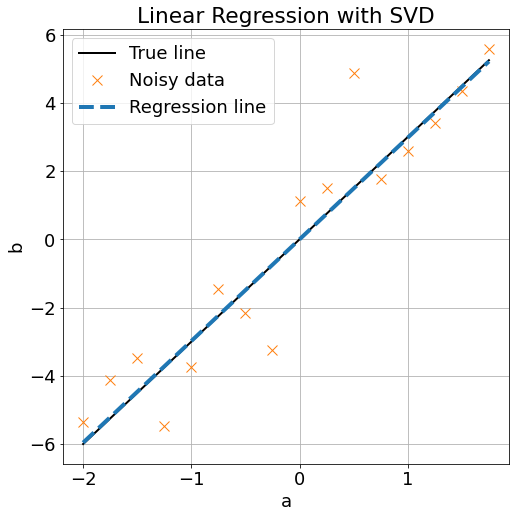

In [3]:
# Figure 1.9
# Linear Regression using SVD Explicitly
U, S, VT = svd(a[:, np.newaxis], full_matrices=False)
Σ = np.diag(S)

# Least-square fit
xtilde_svd = VT.T @ inv(Σ) @ U.T @ b

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(a, x * a, color='black', linewidth=2, label='True line') # True relationship
ax.plot(a, b, 'x', color='C1', markersize=10, label='Noisy data') # Noisy measurements
ax.plot(a, xtilde_svd * a, '--', color='C0', linewidth=4, label='Regression line')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.grid(True)
ax.set_title('Linear Regression with SVD')
ax.legend();

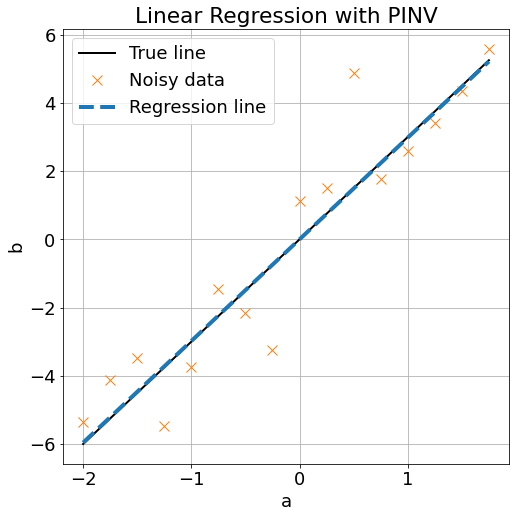

In [4]:
# Linear Regression using Moore-Penrose Pseudoinverse (pinv)

xtilde_pinv = pinv(a[:, np.newaxis]) @ b

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(a, x*a, color='black', linewidth=2, label='True line') # True relationship
ax.plot(a, b, 'x', color='C1', markersize=10, label='Noisy data') # Noisy measurements
ax.plot(a, xtilde_pinv * a, '--', color='C0', linewidth=4, label='Regression line')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.grid(True)
ax.set_title('Linear Regression with PINV')
ax.legend();

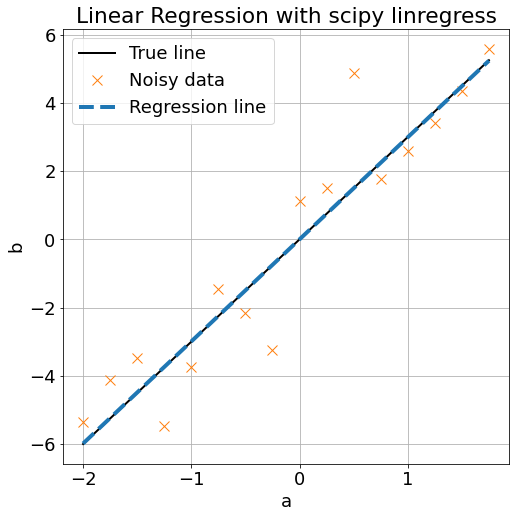

In [5]:
# Linear Regression using Scipy lingress (as standin for matlab regress)
xtilde_linregress, _, _, _, _ = linregress(a, b)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(a, x*a, color='black', linewidth=2, label='True line') # True relationship
ax.plot(a, b, 'x', color='C1', markersize=10, label='Noisy data') # Noisy measurements
ax.plot(a, a * xtilde_linregress, '--', color='C0', linewidth=4, label='Regression line')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.grid(True)
ax.set_title('Linear Regression with scipy linregress')
ax.legend();